In [1]:
#MAIN LOOP - where we run the simulations to figure out statistical significance of changes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
from bootstrap import *
import numpy.ma as ma
from chr_matplotlib import remappedColorMap

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

time: 6.19 ms


In [3]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

time: 51.4 ms


In [4]:
def smooth(P,dayrange,latrange):
    Psmooth=np.zeros(P.shape)
    
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    for d in range(days):
        for j in range(lats):
            
            Psample = P.take(range(d-ll,d+ll+1), mode='wrap', axis=0)
            Ps = Psample[:,max(0,j-yy):min(days,j+yy+1)]
            Psmooth[d,j] = np.mean(np.mean(Ps))
    
    return Psmooth

time: 6.57 ms


In [5]:
#years of interest - start and end date, with index starting at 1 out of habit.
p1_yr_b = [1,30]
p1_yr_e = [29,43]
p2_yr_b = [30,44]
p2_yr_e = [57,57]

P_total_diff = []
P_band_diff = []
P_local_diff = []

#cycle through all time periods of interest and find changes in each type of rainfall b/w periods
for p1_b, p1_e, p2_b, p2_e, i in zip(p1_yr_b, p1_yr_e, p2_yr_b, p2_yr_e, np.arange(len(p1_yr_b))): 
    
    P_total_diff.append(np.mean(P_total[:,:,p2_b-1:p2_e], axis=2) - \
                         np.mean(P_total[:,:,p1_b-1:p1_e], axis=2))
    P_band_diff.append(np.mean(P_band[:,:,p2_b-1:p2_e], axis=2) \
                       - np.mean(P_band[:,:,p1_b-1:p1_e], axis=2))
    P_local_diff.append(np.mean(P_local[:,:,p2_b-1:p2_e], axis=2) \
                        - np.mean(P_local[:,:,p1_b-1:p1_e], axis=2))

time: 20.3 ms


In [6]:
## SMOOTHING ##
#smooth out the decadal precipitation means
#but, no latitudinal smoothing since rainfall already effectively smoothed in latitude
daysmth = 15
latsmth = 0

#one line! thank you python!
P_total_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_total_diff ]
P_band_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_band_diff ]
P_local_diff_smth = [ smooth(x,daysmth,latsmth) for x in P_local_diff ]

time: 4.33 s


In [7]:
## LOAD COMPUTED P-VALUES ##

#which set of sim values are we trying to access?
pval_root = 'chinarain_diff_pval_'
blklen = 2
niter = 2000

P_total_diff_pval = []
P_band_diff_pval = []
P_local_diff_pval = []

#cycle through all time periods of interest and find changes in each type of rainfall b/w periods
for p1_b, p1_e, p2_b, p2_e, i in zip(p1_yr_b, p1_yr_e, p2_yr_b, p2_yr_e, np.arange(len(p1_yr_b))): 
    
    #LOAD P-VALUES FOR TOTAL RAINFALL
    raintype = 'total'
    yrs = str(p1_b+50) + str(p1_e+50) + '_' + str(p2_b+50) + str(p2_e+50) + '_'
    pval_filename = pval_root + yrs + raintype + '_' + str(blklen) + 'day_' \
        + str(niter) + 'iter.nc'
    
    if os.path.isfile(pval_filename):
        print(pval_filename + ' found')
        myf = nc.Dataset(pval_filename, 'r')
        P_total_diff_pval.append(myf.variables['pval'][:])
        myf.close()
        
    else:
        print(pval_filename + ' does not exist')
    
    
    ##LOAD P-VALUES FOR BANDED RAINFALL
    raintype = 'band'
    yrs = str(p1_b+50) + str(p1_e+50) + '_' + str(p2_b+50) + str(p2_e+50) + '_'
    pval_filename = pval_root + yrs + raintype + '_' + str(blklen) + 'day_' \
        + str(niter) + 'iter.nc'
    
    if os.path.isfile(pval_filename):
        print(pval_filename + ' found')
        myf = nc.Dataset(pval_filename, 'r')
        P_band_diff_pval.append(myf.variables['pval'][:])
        myf.close()
        
    else:
        print(pval_filename + ' does not exist')
            
    ##LOAD P-VALUES FOR LOCAL RAINFALL
    raintype = 'local'
    yrs = str(p1_b+50) + str(p1_e+50) + '_' + str(p2_b+50) + str(p2_e+50) + '_'
    pval_filename = pval_root + yrs + raintype + '_' + str(blklen) + 'day_' \
        + str(niter) + 'iter.nc'
    
    if os.path.isfile(pval_filename):
        print(pval_filename + ' found')
        myf = nc.Dataset(pval_filename, 'r')
        P_local_diff_pval.append(myf.variables['pval'][:])
        myf.close()
        
    else:
        print(pval_filename + ' does not exist')    
        
    #P_total_diff.append()
    #P_band_diff.append(np.mean(P_band[:,:,p2_b-1:p2_e], axis=2) \
    #P_local_diff.append(np.mean(P_local[:,:,p2_b-1:p2_e], axis=2) \


chinarain_diff_pval_5179_80107_total_2day_2000iter.nc found
chinarain_diff_pval_5179_80107_band_2day_2000iter.nc found
chinarain_diff_pval_5179_80107_local_2day_2000iter.nc found
chinarain_diff_pval_8093_94107_total_2day_2000iter.nc found
chinarain_diff_pval_8093_94107_band_2day_2000iter.nc found
chinarain_diff_pval_8093_94107_local_2day_2000iter.nc does not exist
time: 62.4 ms


In [8]:
## CREATE MASKED ARRAYS - only show values that are statistically significant
#create two masked arrays - one showing 95% confidence, one showing 99% confidence

##two separate for loops: first one creates masks, second one produces masked rainfall.
#reason for doing things this way is that masks can then be accessed at a later point in time.

#not super-pythonic method, but at least it makes it easy to understand.

mk_total = [] #storage format will be a LIST of 2-element tuples - each set of tuples is the 95% and 99% mask respectively
mk_band = []
mk_local = []

#cycle through each of the different time periods of interest
for P_total_diff, P_band_diff, P_local_diff, P_total_pval, P_band_pval, P_local_pval in \
    zip(P_total_diff_smth, P_band_diff_smth, P_local_diff_smth, P_total_diff_pval, P_band_diff_pval, P_local_diff_pval):
    
    mk_total_95 = abs(P_total_pval-.5) < .475 #95th percentile mask for rainfall changes
    mk_total_99 = abs(P_total_pval-.5) < .495 #99th percentile mask for rainfall changes
    mk_total.append((mk_total_95,mk_total_99))
    
    mk_band_95 = abs(P_band_pval-.5) < .475 #95th percentile mask for rainfall changes
    mk_band_99 = abs(P_band_pval-.5) < .495 #99th percentile mask for rainfall changes
    mk_band.append((mk_band_95,mk_band_99))
    
    mk_local_95 = abs(P_local_pval-.5) < .475 #95th percentile mask for rainfall changes
    mk_local_99 = abs(P_local_pval-.5) < .495 #99th percentile mask for rainfall changes
    mk_local.append((mk_local_95,mk_local_99))
    
#create masked arrays
P_total_diff_mask = []
P_band_diff_mask = []
P_local_diff_mask = []

for P_total_diff, P_band_diff, P_local_diff, mask_total, mask_band, mask_local in \
    zip(P_total_diff_smth, P_band_diff_smth, P_local_diff_smth, mk_total, mk_band, mk_local):
    
    P_total_diff_mask.append(ma.array(P_total_diff, mask = mask_total[0]))
    P_band_diff_mask.append(ma.array(P_band_diff, mask = mask_band[0]))
    P_local_diff_mask.append(ma.array(P_local_diff, mask = mask_local[0]))
    
#P_total_diff_smth_mask = [ print(x.shape) for (x,y) in zip(P_total_diff_smth,P_total_diff_pval) ]
#P_total_diff_smth_mask = [ ma.array(x,mask = abs(y)-.5 > .475) for (x,y) in zip(P_total_diff_smth,P_total_diff_pval) ]
#P_band_diff_smth_mask = [ smooth(x,daysmth,latsmth) for x in P_band_diff_smth ]
#P_local_diff_smth_mask = [ smooth(x,daysmth,latsmth) for x in P_local_diff_smth ]

time: 19.6 ms


In [11]:
axmax = max(np.max(P_total_diff_mask[0]),np.max(P_band_diff_mask[0]),np.max(P_local_diff_mask[0]))
axmin = min(np.min(P_total_diff_mask[0]),np.min(P_band_diff_mask[0]),np.min(P_local_diff_mask[0]))

axlim = max(axmax,-axmin)

2.14082144474
-2.65746721782
2.65746721782
time: 7.08 ms


In [15]:
plt.cm.get_cmap('bwr')

time: 1.72 ms


In [26]:
remap_start = 0
remap_mid = (abs(axmin))/(axmax+abs(axmin))
remap_stop = 1-(abs(axmin)-axmax)/(2*abs(axmin))

print(remap_mid)
print(remap_stop)

cmap_test = remappedColorMap(plt.cm.get_cmap('bwr_r'), start=0, midpoint=remap_mid, stop=remap_stop)


0.553836462269
0.902793575474
time: 16.3 ms


2.65746721782


<IPython.core.display.Javascript object>


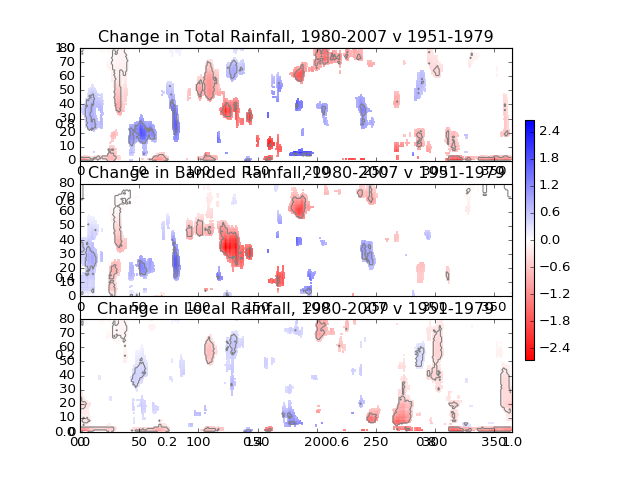

time: 241 ms


In [72]:
## CREATE FIGURE OF 1951-1979 v 1980-2007 changes

axlim = max(np.max(abs(P_total_diff_mask[0])),np.max(abs(P_band_diff_mask[0])),np.max(abs(P_local_diff_mask[0])))
print(axlim) #used to scale colorbar

fig, ax = plt.subplots()
ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(P_total_diff_mask[0].T, cmap = 'bwr_r', vmin = -axlim, vmax = axlim); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')
ax1.set_title("Change in Total Rainfall, 1980-2007 v 1951-1979")

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(P_band_diff_mask[0].T, cmap = 'bwr_r', vmin = -axlim, vmax = axlim); 
plt.contour(mk_band[0][1].T,1,colors = 'gray')
ax2.set_title("Change in Banded Rainfall, 1980-2007 v 1951-1979")

ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(P_local_diff_mask[0].T, cmap = 'bwr_r', vmin = -axlim, vmax = axlim); 
plt.contour(mk_local[0][1].T,1,colors = 'gray')
ax3.set_title("Change in Local Rainfall, 1980-2007 v 1951-1979")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.015, 0.5])
fig.colorbar(plot2, cax = cbar_ax)

<IPython.core.display.Javascript object>


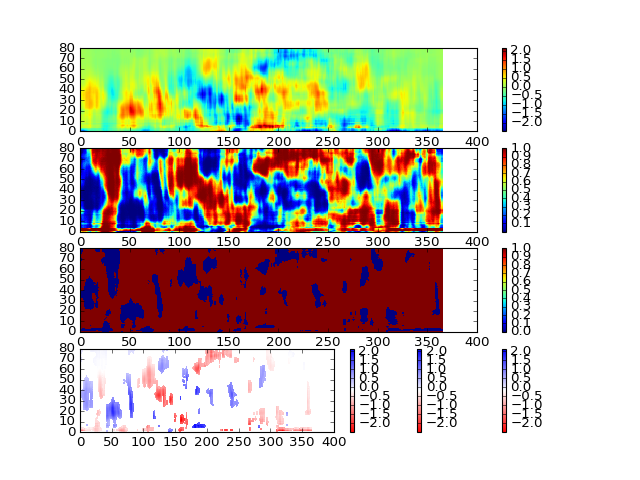

time: 357 ms


In [123]:
cmaps = ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr','RdBu', 'RdGy', \
                       'RdYlBu', 'RdYlGn', 'Spectral','seismic'],

fig = plt.figure()
ax1 = fig.add_subplot(4,1,1)
plot = ax1.pcolormesh(P_total_diff_smth[0].T); 
fig.colorbar(plot)

ax2 = fig.add_subplot(4,1,2)
plot = ax2.pcolormesh(P_total_diff_pval[0].T); 
fig.colorbar(plot)

ax3 = fig.add_subplot(4,1,3)
plot = ax3.pcolormesh(mk.T); 
fig.colorbar(plot)

ax4 = fig.add_subplot(4,1,4)
plot = ax4.pcolormesh(tst.T, cmap = 'bwr_r'); 
fig.colorbar(plot)



<IPython.core.display.Javascript object>


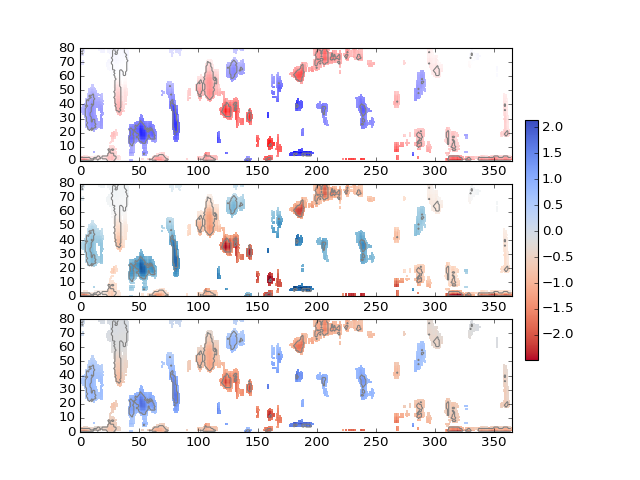

time: 13.8 s


In [70]:
cmaps = ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr','RdBu', 'RdGy', \
                       'RdYlBu', 'RdYlGn', 'Spectral','seismic'],
fig2 = plt.figure()

ax4 = fig2.add_subplot(3,1,1)

plot = ax4.pcolormesh(P_total_diff_mask[0].T, cmap = 'bwr_r'); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

ax5 = fig2.add_subplot(3,1,2)

plot = ax5.pcolormesh(P_total_diff_mask[0].T, cmap = 'RdBu'); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

ax6 = fig2.add_subplot(3,1,3)

plot = ax6.pcolormesh(P_total_diff_mask[0].T, cmap = 'coolwarm_r'); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.82, 0.25, 0.02, 0.5])
fig2.colorbar(plot, cax = cbar_ax)

plt.savefig('rain_palette_test.pdf')


2.65746721782


<IPython.core.display.Javascript object>


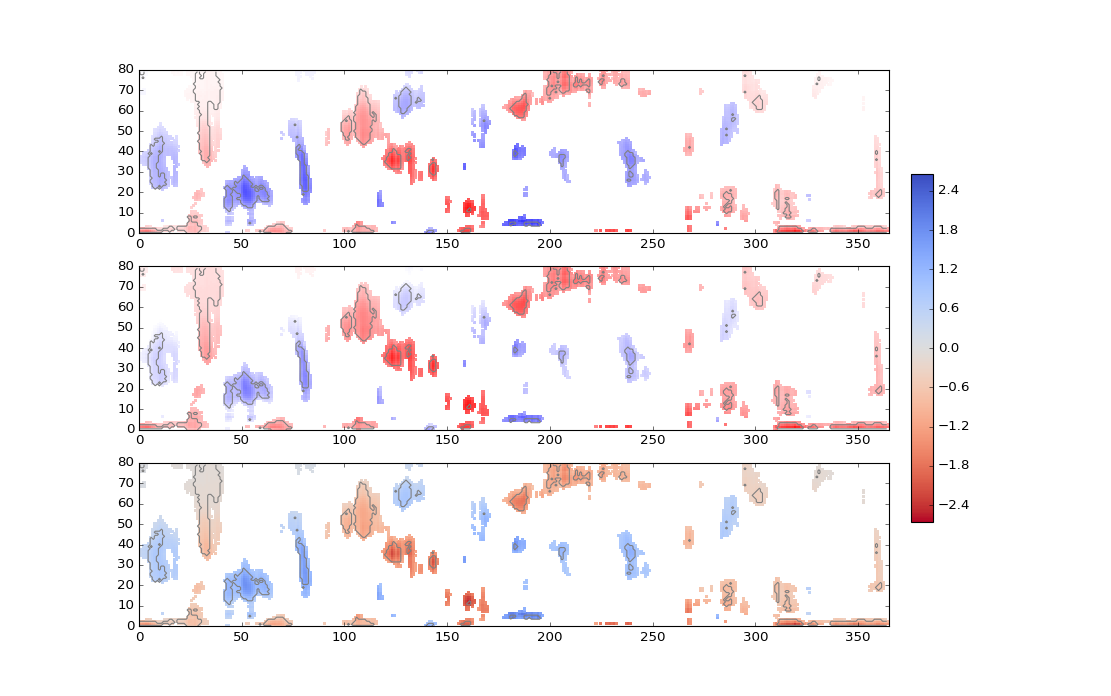

time: 11.9 s


In [27]:
axlim = max(np.max(abs(P_total_diff_mask[0])),np.max(abs(P_band_diff_mask[0])),np.max(abs(P_local_diff_mask[0])))
print(axlim) #used to scale colorbar

cmaps = ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr','RdBu', 'RdGy', \
                       'RdYlBu', 'RdYlGn', 'Spectral','seismic'],
fig2 = plt.figure()

ax4 = fig2.add_subplot(3,1,1)

plot = ax4.pcolormesh(P_total_diff_mask[0].T, cmap = 'bwr_r', vmin=-axlim, vmax=axlim); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

ax5 = fig2.add_subplot(3,1,2)

plot = ax5.pcolormesh(P_total_diff_mask[0].T, cmap = 'RdBu', vmin=-axlim, vmax=axlim); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

ax6 = fig2.add_subplot(3,1,3)

plot = ax6.pcolormesh(P_total_diff_mask[0].T, cmap = 'coolwarm_r', vmin=-axlim, vmax=axlim); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.82, 0.25, 0.02, 0.5])
fig2.colorbar(plot, cax = cbar_ax)

plt.savefig('rain_palette_test_2.pdf')


<IPython.core.display.Javascript object>


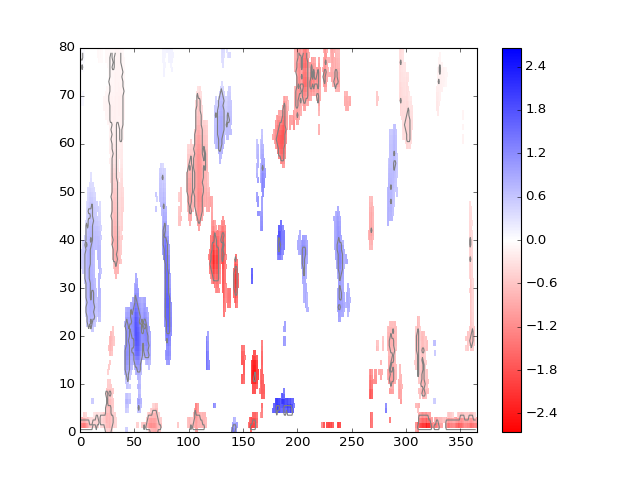

time: 4.15 s


In [37]:
fig3, ax3 = plt.subplots()

plot = ax3.pcolormesh(P_total_diff_mask[0].T, cmap = 'bwr_r', vmin=-axlim, vmax=axlim); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')
fig3.colorbar(plot)

plt.savefig('rain_palette_test_3.pdf')


<IPython.core.display.Javascript object>


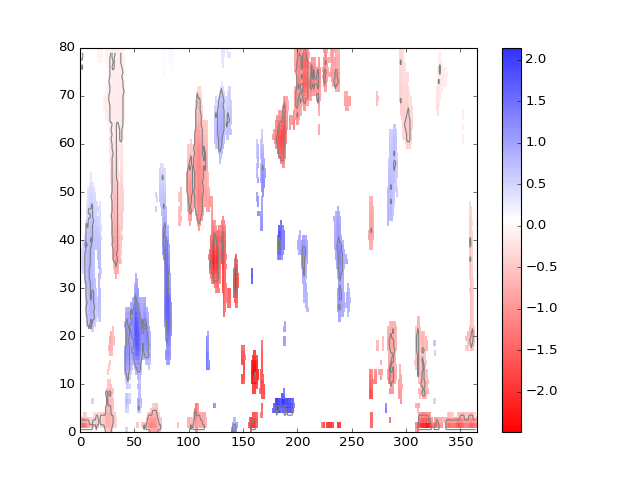

0.553836462269
0.902793575474
time: 4.03 s


In [41]:
fig4, ax4 = plt.subplots()

remap_start = 0
remap_mid = (abs(axmin))/(axmax+abs(axmin))
remap_stop = 1-(abs(axmin)-axmax)/(2*abs(axmin))

print(remap_mid)
print(remap_stop)

cmap_test = remappedColorMap(plt.cm.get_cmap('bwr_r'), start=0, midpoint=remap_mid, stop=remap_stop)

plot2 = ax4.pcolormesh(P_total_diff_mask[0].T, cmap = cmap_test); 
plt.contour(mk_total[0][1].T,1,colors = 'gray')
fig4.colorbar(plot2)

plt.savefig('rain_palette_test_4.pdf')